<a href="https://colab.research.google.com/github/umjiwoo/ubion/blob/main/PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df_origin = pd.read_csv("./Data/application_data.csv")
# df_origin.head(3)

df_origin = pd.read_csv("/content/drive/MyDrive/ubion/application_data.csv")

In [ ]:
# 원본 복구를 위해 copy()해놓음
# df로 작업하고 원본과 비교 필요 시 df_origin으로 확인

df = df_origin.copy()

print(df.shape)
df.info(verbose=True, null_counts=True)

(307511, 122)


<ipython-input-4-f6a93444bd52>:7: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [ ]:
# 컬럼명 지정해서 삭제하기 전(column index 순서 바뀌기 전) column index로 뭉텅이 삭제

# EXT_SOURCE 1~3 -> 의미파악불가
col_drop1 = df_origin.columns[41:44]
df.drop(col_drop1, axis=1, inplace=True)

# 주거 관련 columns  -> 의미파악불가 
col_drop2 = df_origin.columns[44:95]
df.drop(col_drop2, axis=1, inplace=True)

# FLAG_DOCUMENT_2~21 -> 의미파악 불가 
col_drop3 = df_origin.columns[96:116]
df.drop(col_drop3, axis=1, inplace=True)

In [ ]:
df.drop(['SK_ID_CURR', 
         'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE',
         'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
         'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
         'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY' ], axis=1, inplace=True)

In [ ]:
df.drop((df.loc[(df['DAYS_EMPLOYED'] > 0)&(df['OCCUPATION_TYPE']=='Cleaning staff')].index),axis=0,inplace=True)

## df.drop((df.loc[(df['DAYS_EMPLOYED'] > 0) & (df['ORGANIZATION_TYPE'] == "XNA")& (df['OCCUPATION_TYPE']=="Cleaning staff")])

#   df['OCCUPATION_TYPE'] 결측치에서 df['DAYS_EMPLOYED'] > 0) & (df['ORGANIZATION_TYPE'] == 'XNA') 인 사람들 'Unemployed' 로 바꿀건데
#   df['DAYS_EMPLOYED'] > 0 인 사람들이랑 df['ORGANIZATION_TYPE'] == 'XNA' 사람들 같은 사람들이라서 바꿀 때 하나만 조건으로 해도 됨

In [ ]:
# 이상치 삭제 잘 됐는지 확인
len(df.loc[(df['DAYS_EMPLOYED'] > 0 )& (df['OCCUPATION_TYPE']=="Cleaning staff")])

0

In [ ]:
# 결측치 0으로 대체
df['OCCUPATION_TYPE'].fillna(0,inplace=True)

In [ ]:
# DAYS_EMPLOYED 가 양수이면서 OCCUPATION_TYPE 이 nan이었던 데이터에 대해 Unemployed로 대체
df.loc[(df['DAYS_EMPLOYED'] > 0)&(df['OCCUPATION_TYPE']==0),'OCCUPATION_TYPE']='Unemployed'

In [ ]:
print(f"occu 전체 개수 : {len(df['OCCUPATION_TYPE'])}")
print(f"미응답 데이터 개수 : {len(df.loc[(df['OCCUPATION_TYPE']==0)])}")
print(f"미응답 데이터 삭제 후 개수 : {len(df['OCCUPATION_TYPE']) - len(df.loc[(df['OCCUPATION_TYPE']==0)])}")

occu 전체 개수 : 307509
미응답 데이터 개수 : 41019
미응답 데이터 삭제 후 개수 : 266490


In [ ]:
df.drop((df.loc[(df['OCCUPATION_TYPE']==0)].index),axis=0,inplace=True)
len(df)

266490

In [ ]:
df['DAYS_EMPLOYED'] = np.where(df['DAYS_EMPLOYED'] <= 0, -(df['DAYS_EMPLOYED'])+1, 0)

In [ ]:
# ORGANIZATION_TYPE XNA를 No_organization 으로 변경
df['ORGANIZATION_TYPE'] = np.where(df['ORGANIZATION_TYPE'] == 'XNA', 'No_organization', df['ORGANIZATION_TYPE'])

In [ ]:
#같은 유형끼리 type 묶기 - 진행 중
# df['ORGANIZATION_TYPE'].value_counts().sort_index()
num = 1

while True:
    df.loc[df["ORGANIZATION_TYPE"]==f"Transport: type {num}","ORGANIZATION_TYPE"]="Transport"
    num += 1

    if num == 6:
        break

In [ ]:
num = 1

while True:
    df.loc[df["ORGANIZATION_TYPE"]==f"Trade: type {num}","ORGANIZATION_TYPE"]="Trade"
    num += 1

    if num == 9:
        break

In [ ]:
num = 1

while True:
    df.loc[df["ORGANIZATION_TYPE"]==f"Business Entity Type {num}","ORGANIZATION_TYPE"]="Business Entity"
    num += 1

    if num == 5:
        break

In [ ]:
num = 1

while True:
    df.loc[df["ORGANIZATION_TYPE"]==f"Industry: type {num}","ORGANIZATION_TYPE"]="Industry"
    num += 1

    if num == 15:
        break

In [ ]:
# CODE_GENDER XNA데이터(4개) 삭제
df.drop(df.loc[df["CODE_GENDER"]=="XNA"].index, axis=0, inplace=True)

In [ ]:
# DAYS_LAST_PHONE_CHANGE 결측치(1개) 삭제
df.drop(df.loc[df["DAYS_LAST_PHONE_CHANGE"].isna()].index, axis=0, inplace=True)

In [ ]:
# 나이(DAYS_BIRTH)보다 거주일수(DAYS_REGISTRATION)가 많은 경우 삭제
df.drop(df.loc[(-df["DAYS_REGISTRATION"] > -df["DAYS_BIRTH"])].index, axis=0, inplace=True)

In [ ]:
# AMT_ANNUITY 결측치(12개) 삭제
df.drop(df.loc[df["AMT_ANNUITY"].isna()].index, axis=0, inplace=True)
df.loc[df["AMT_ANNUITY"].isna()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [ ]:
# AMT_GOODS_PRICE 결측치(276개) 삭제
df.drop(df.loc[df["AMT_GOODS_PRICE"].isna()].index, axis=0, inplace=True)
df.loc[df["AMT_GOODS_PRICE"].isna()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [ ]:
# DAYS_LAST_PHONE_CHANGE 양수 및 년단위 변환
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"].apply(lambda x:(-x)/365)

# DAYS_REGISTRATION 양수 및 년단위 변환
df["DAYS_REGISTRATION"] = df["DAYS_REGISTRATION"].apply(lambda x:(-x)/365)

# DAYS_BIRTH 양수 및 년단위 변환
df["DAYS_BIRTH"] = df["DAYS_BIRTH"].apply(lambda x:(-x)/365)

# DAYS_ID_PUBLISH 양수 및 년단위 변환
df["DAYS_ID_PUBLISH"] = df["DAYS_ID_PUBLISH"].apply(lambda x:(-x)/365)

In [ ]:
# 화폐 단위 변환
df["AMT_INCOME_TOTAL"] = df["AMT_INCOME_TOTAL"].apply(lambda x:int(x*16.08))
df["AMT_INCOME_TOTAL"]

0         3256199
1         4341600
2         1085400
3         2170800
4         1953719
           ...   
307506    2532599
307507    1157759
307508    2460239
307509    2749679
307510    2532599
Name: AMT_INCOME_TOTAL, Length: 266236, dtype: int64

In [ ]:
# OWN_CAR_AGE이 60 이상인 값 삭제
df.drop(df.loc[df["OWN_CAR_AGE"]>= 60].index, axis=0, inplace=True)


# 결측치 -> '차 없음' 으로 판단해서 결측치 외 모든 값+1
# df.loc[df["OWN_CAR_AGE"]== 0] #2134개
df["OWN_CAR_AGE"] = df["OWN_CAR_AGE"].apply(lambda x:x+1)


# 차량연식 결측치는 0으로 대체
df["OWN_CAR_AGE"].fillna(0, inplace=True)
df["OWN_CAR_AGE"]


# 정수로 바꾸기
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].astype(int)

In [ ]:
# 가구원 수 6이상인 값 5로 대체
df['CNT_FAM_MEMBERS'] = np.where(df['CNT_FAM_MEMBERS'] >= 6, 5, df['CNT_FAM_MEMBERS'])

In [ ]:
### 문의 횟수 데이터
# 최빈값(0)으로 대체 <- 대부분 0이 70~80%이었음
AMT = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT"]
for col in AMT:
  print(df[col].isna().sum())
  mode_1 = df[col].mode()[0]
  df[col].fillna(mode_1,inplace=True)
  print(df[col].isna().sum())

35627
0
35627
0
35627
0
35627
0
35627
0


In [ ]:
# 중앙값으로 대체 <- 0에 분포가 많이 되어있으므로 
print(df['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum())
median = df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
print(median)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(median,inplace=True)
print(df['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum())

35627
1.0
0


In [ ]:
mode_1 = df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(mode_1,inplace=True)
df['AMT_REQ_CREDIT_BUREAU_HOUR']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    1.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 263392, dtype: float64

In [ ]:
# 정수로 바꾸기
float_int = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY' ,'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for col in float_int:
    print(df[col].dtype)
    df[col] = df[col].astype(int)
    print(df[col].dtype)

float64
int64
float64
int64
float64
int64
float64
int64
float64
int64
float64
int64


### 파생변수 생성

In [ ]:
df["DAYS_ID_PUBLISH_int"] = df["DAYS_ID_PUBLISH"].apply(lambda x:int(x))
df["DAYS_BIRTH_int"] = df["DAYS_BIRTH"].apply(lambda x:int(x))
df["DAYS_REGISTRATION_int"] = df["DAYS_REGISTRATION"].apply(lambda x:int(x))
df["DAYS_LAST_PHONE_CHANGE_int"] = df["DAYS_LAST_PHONE_CHANGE"].apply(lambda x:int(x))

In [ ]:
# 나이대 변환
df['DAYS_BIRTH_int_n0s']=""
df.loc[(df['DAYS_BIRTH_int']>=20) & (df['DAYS_BIRTH_int'] <30),"DAYS_BIRTH_int_n0s"]="20s"
df.loc[(df['DAYS_BIRTH_int']>=30) & (df['DAYS_BIRTH_int'] <40),"DAYS_BIRTH_int_n0s"]="30s"
df.loc[(df['DAYS_BIRTH_int']>=40) & (df['DAYS_BIRTH_int'] <50),"DAYS_BIRTH_int_n0s"]="40s"
df.loc[(df['DAYS_BIRTH_int']>=50) & (df['DAYS_BIRTH_int'] <60),"DAYS_BIRTH_int_n0s"]="50s"
df.loc[(df['DAYS_BIRTH_int']>=60),"DAYS_BIRTH_int_n0s"]="60s"

In [ ]:
# 신분증발급연차 정수로
df["DAYS_ID_PUBLISH_int"] = df["DAYS_ID_PUBLISH"].apply(lambda x:int(x))

# 나이를 정수로
df["DAYS_BIRTH_int"] = df["DAYS_BIRTH"].apply(lambda x:int(x))

# 전입 연차 정수로
df["DAYS_REGISTRATION_int"] = df["DAYS_REGISTRATION"].apply(lambda x:int(x))

In [ ]:
# HOUR_APPR_PROCESS_START에서 9-16시 & 그외시간 , 이진분류 파생변수컬럼 생성 =>Is_Business_hours
df['Is_Business_hours']=3
df.loc[(df['HOUR_APPR_PROCESS_START']>=9) | (df['HOUR_APPR_PROCESS_START'] < 17),"Is_Business_hours"]=1
df.loc[df['HOUR_APPR_PROCESS_START']>=17,"Is_Business_hours"]=0
# df['Is_Business_hours'].value_counts()
df["Is_Business_hours"]

0         1
1         1
2         1
3         0
4         1
         ..
307506    1
307507    1
307508    1
307509    1
307510    0
Name: Is_Business_hours, Length: 263392, dtype: int64

### 정수형으로 바꾼 데이터 원본 일자 컬럼 삭제

In [ ]:
# 'DAYS_ID_PUBLISH', 'DAYS_BIRTH', 'DAYS_REGISTRATION', DAYS_LAST_PHONE_CHANGE 삭제
df.drop(['DAYS_ID_PUBLISH', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE'], axis=1, inplace=True)

### 인코딩

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce

#### 원핫

In [ ]:
print(len(df.columns))
onehot =df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH_int_n0s','WEEKDAY_APPR_PROCESS_START']]

# encoder = OneHotEncoder(sparse=False)
# df_1hot = encoder.fit_transform(onehot)
# df_1hot

df_1hot = pd.get_dummies(data = onehot)

38


In [ ]:
df.drop(onehot, axis=1, inplace=True)
print(len(df.columns))
df = pd.concat([df, df_1hot], axis=1)
print(len(df.columns))

31
56


#### 바이너리

In [ ]:
binary = ['NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'HOUR_APPR_PROCESS_START', 'NAME_INCOME_TYPE', 'CNT_FAM_MEMBERS']
df = ce.BinaryEncoder(cols = binary).fit_transform(df)
print(df.columns)
# 이전꺼 보기 inverse_transform(X_in인데 이거는 array-like, shape = [n_samples, n_features])

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE_0',
       'NAME_TYPE_SUITE_1', 'NAME_TYPE_SUITE_2', 'NAME_TYPE_SUITE_3',
       'NAME_INCOME_TYPE_0', 'NAME_INCOME_TYPE_1', 'NAME_INCOME_TYPE_2',
       'NAME_INCOME_TYPE_3', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE_0',
       'NAME_HOUSING_TYPE_1', 'NAME_HOUSING_TYPE_2',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE_0', 'OCCUPATION_TYPE_1',
       'OCCUPATION_TYPE_2', 'OCCUPATION_TYPE_3', 'OCCUPATION_TYPE_4',
       'CNT_FAM_MEMBERS_0', 'CNT_FAM_MEMBERS_1', 'CNT_FAM_MEMBERS_2',
       'HOUR_APPR_PROCESS_START_0', 'HOUR_APPR_PROCESS_START_1',
       'HOUR_APPR_PROCESS_START_2', 'HOUR_APPR_PROCESS_START_3',
       'HOUR_APPR_PROCESS_START_4', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE_0', 'ORGANIZATION_TYPE_1',
       'ORGANIZATION_TYPE_2', 'ORGANIZATION_TYPE_3', 'OR

#### 라벨

In [ ]:
edu = df['NAME_EDUCATION_TYPE']
le = LabelEncoder()
le.fit(edu)
label_encoded = le.transform(edu)
label_encoded_1 = pd.Series(label_encoded +1)

dict_ = {'Lower secondary':1, 'Secondary / secondary special':2,'Incomplete higher':3, 'Higher education':4,'Academic degree':5}
# Lower secondary: 중등, Secondary / secondary special: 고등, Incomplete higher: 대학교 중퇴, Higher education: 학사, Academic degree: 석사 이상
df['NAME_EDUCATION_TYPE'] = df.NAME_EDUCATION_TYPE.map(dict_)

### 이상치 확인 함수 - outliers_iqr()

In [ ]:
## 이상치의 값들을 출력하는 함수
## 매개변수는 2개 데이터프레임, 컬럼의 이름, iqr 배수
def outliers_iqr(df, col,t):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) #25프로, 75프로
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (t*iqr)
    upper_whis = quartile_3 + (t*iqr)
    
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    outliers = outliers[[col]]
    
    outlier_percent = str(round(len(outliers)/len(df)*100,2))

    title = f"{col} boxplot\n\n lower : {lower_whis} \n upper : {upper_whis} \n outlier_count : {len(outliers)} \n outlier percentage : {outlier_percent}%\n"

    return [title,df[col]]

### 이상치 박스플롯 그리기 함수 - draw_boxplot()

In [ ]:
def draw_boxplot(col_list,t):
    box_plot_datas = []

    for col in col_list:
        data = outliers_iqr(df, col,t)
        box_plot_datas.append(data)

    plt.figure(figsize=(15,30))

    for i in range(1,len(col_list)+1):
        plt.subplot(len(col_list)//3 + 1,3,i)
        plt.title(box_plot_datas[i-1][0])
        plt.boxplot(box_plot_datas[i-1][1])

    plt.tight_layout(pad=3)
    plt.show()

### 이상치 삭제 함수 - drop_outliers()

In [ ]:
## 이상치 삭제 함수
## 매개변수는 3개 데이터프레임, 컬럼의 이름, iqr 계수
def drop_outliers(df, col, t):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) #25프로, 75프로
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (t*iqr)
    upper_whis = quartile_3 + (t*iqr)
    
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    outliers = outliers[[col]]

    df.drop(index=outliers.index, axis=0, inplace=True)
    
    return df

#### 이상치 삭제

> AMT_INCOME_TOTAL → 2991 Row 제거 iqr배수3
> REGION_POPULATION_RELATIVE→ 2.74%(8337개) Row 제거 iqr배수1.7
> AMT_REQ_CREDIT_BREAU_QRT  → row 2행 제거 (≥ 19) iqr배수1.7

In [ ]:
# REGION_POPULATION_RELATIVE 제거 행 수 : 8337
df = drop_outliers(df,"REGION_POPULATION_RELATIVE",1.7)

In [ ]:
# AMT_REQ_CREDIT_BUREAU_QRT 19이상인 데이터 삭제 - 2개
df.drop(index = df.loc[df["AMT_REQ_CREDIT_BUREAU_QRT"]>=19].index, axis=0,inplace=True)

In [ ]:
# AMT_INCOME_TOTAL 제거 행 수 : 2447
df = drop_outliers(df,"AMT_INCOME_TOTAL",3)

### 이상치 제거 후 박스플롯 그려보기

#### 이상치 정보 뜨게

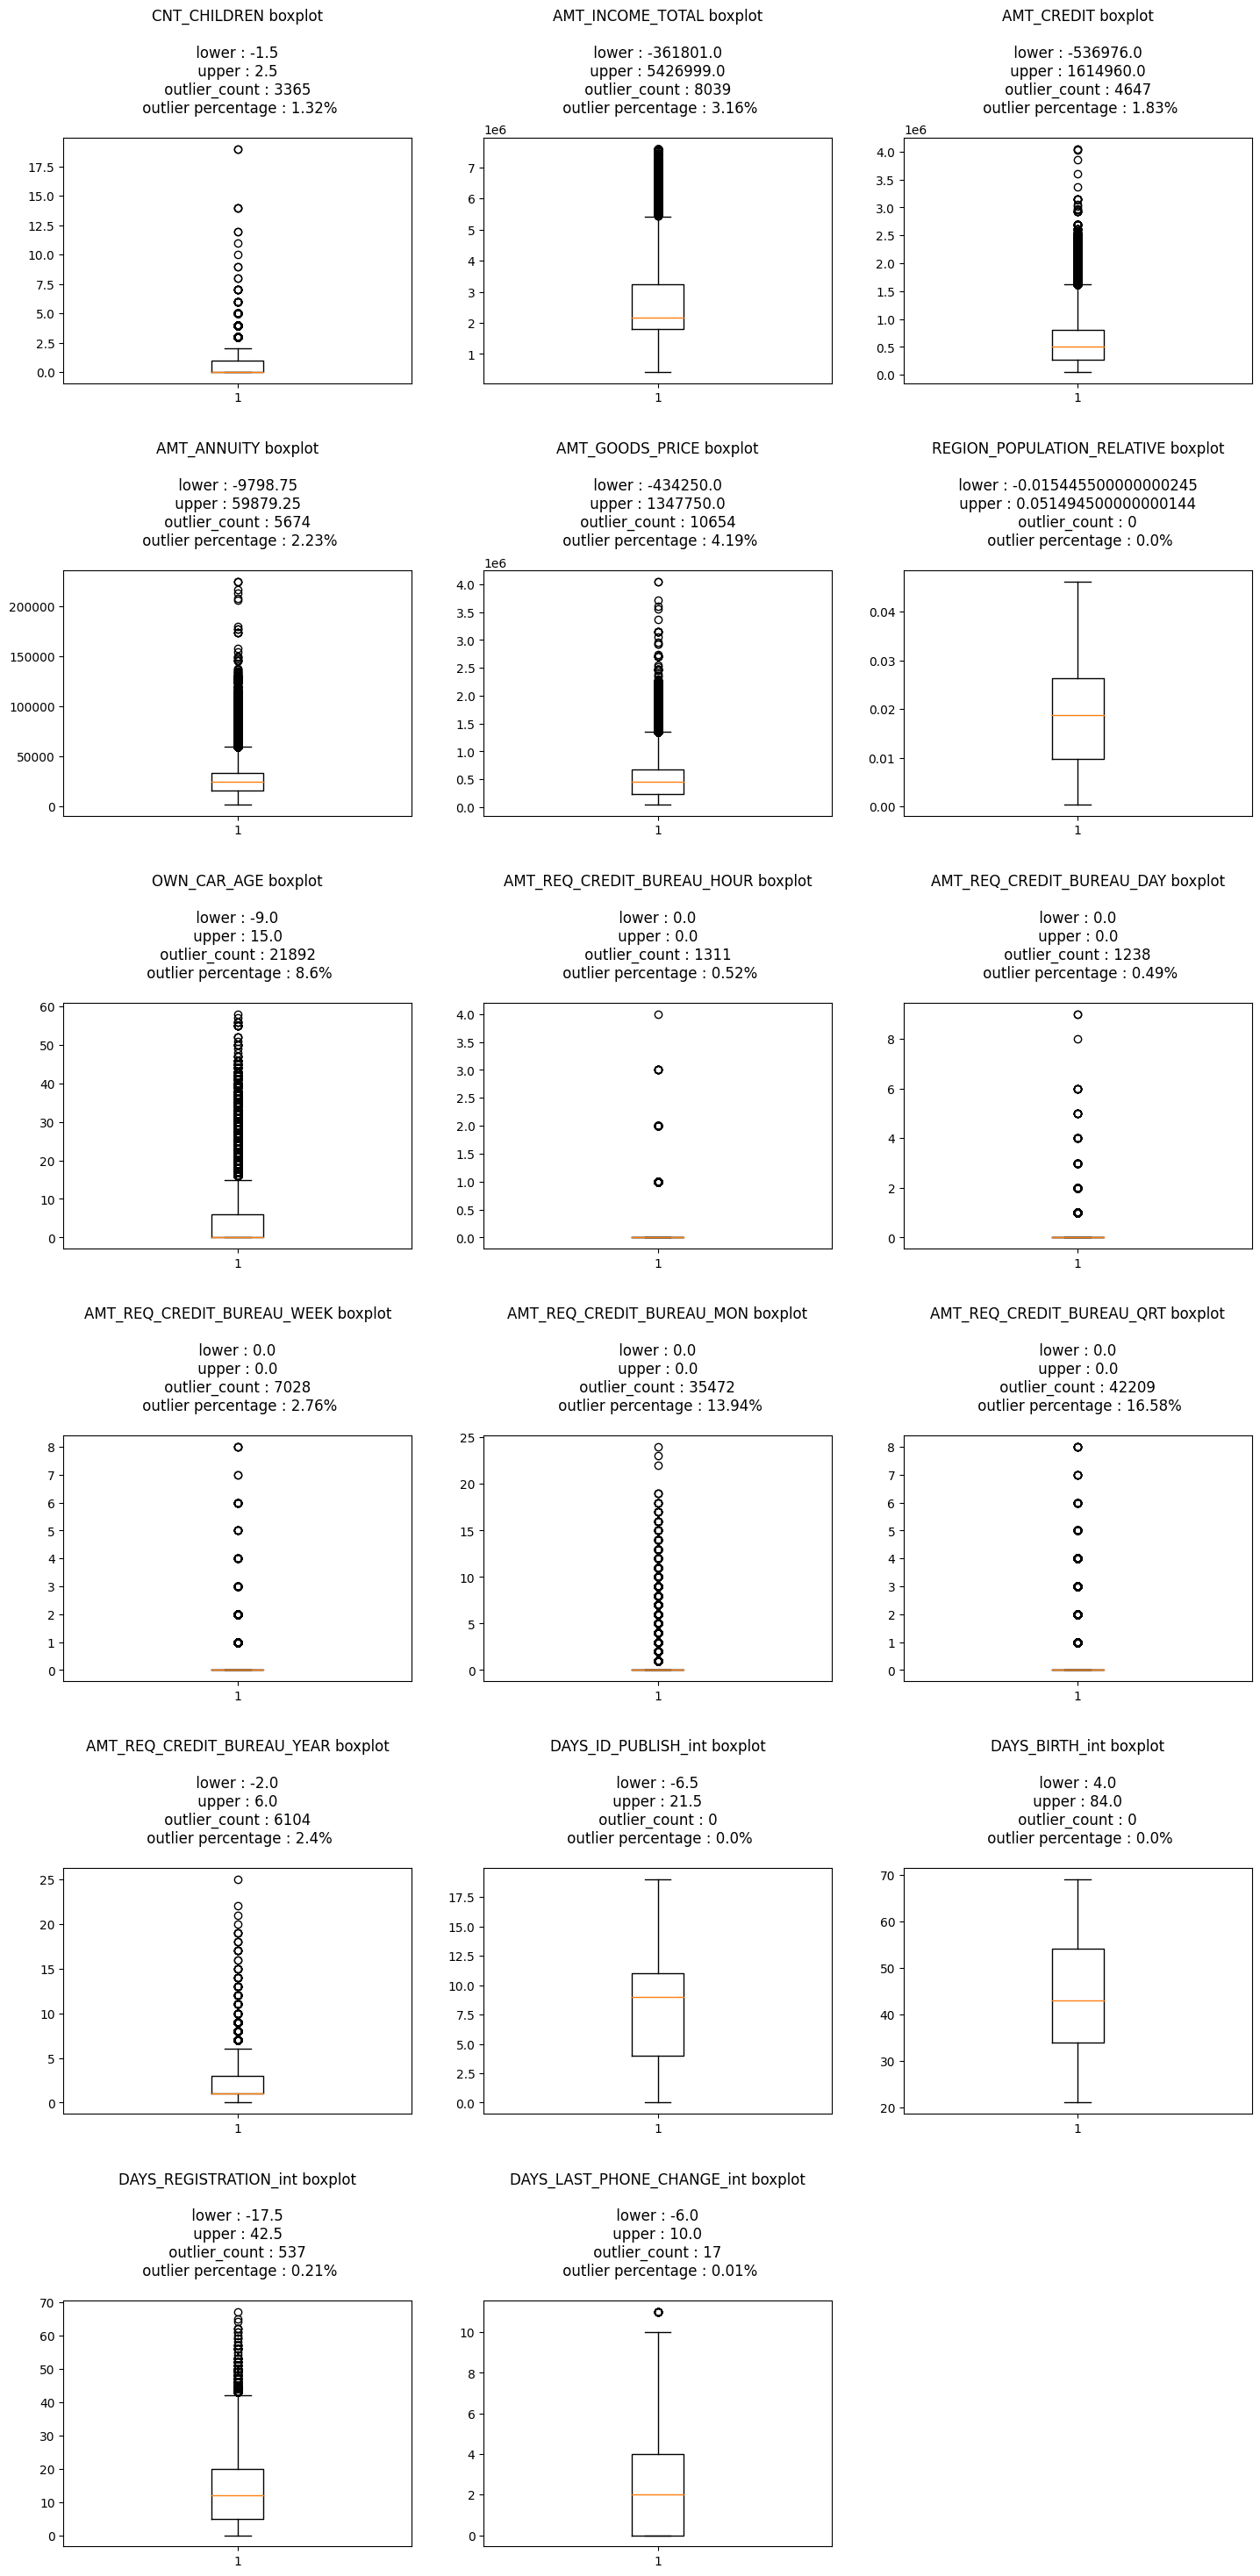

In [ ]:
# 인코딩 안해도 되는 컬럼들
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

draw_boxplot(n_encoding_column,1.5)

#### 이상치 정보 x

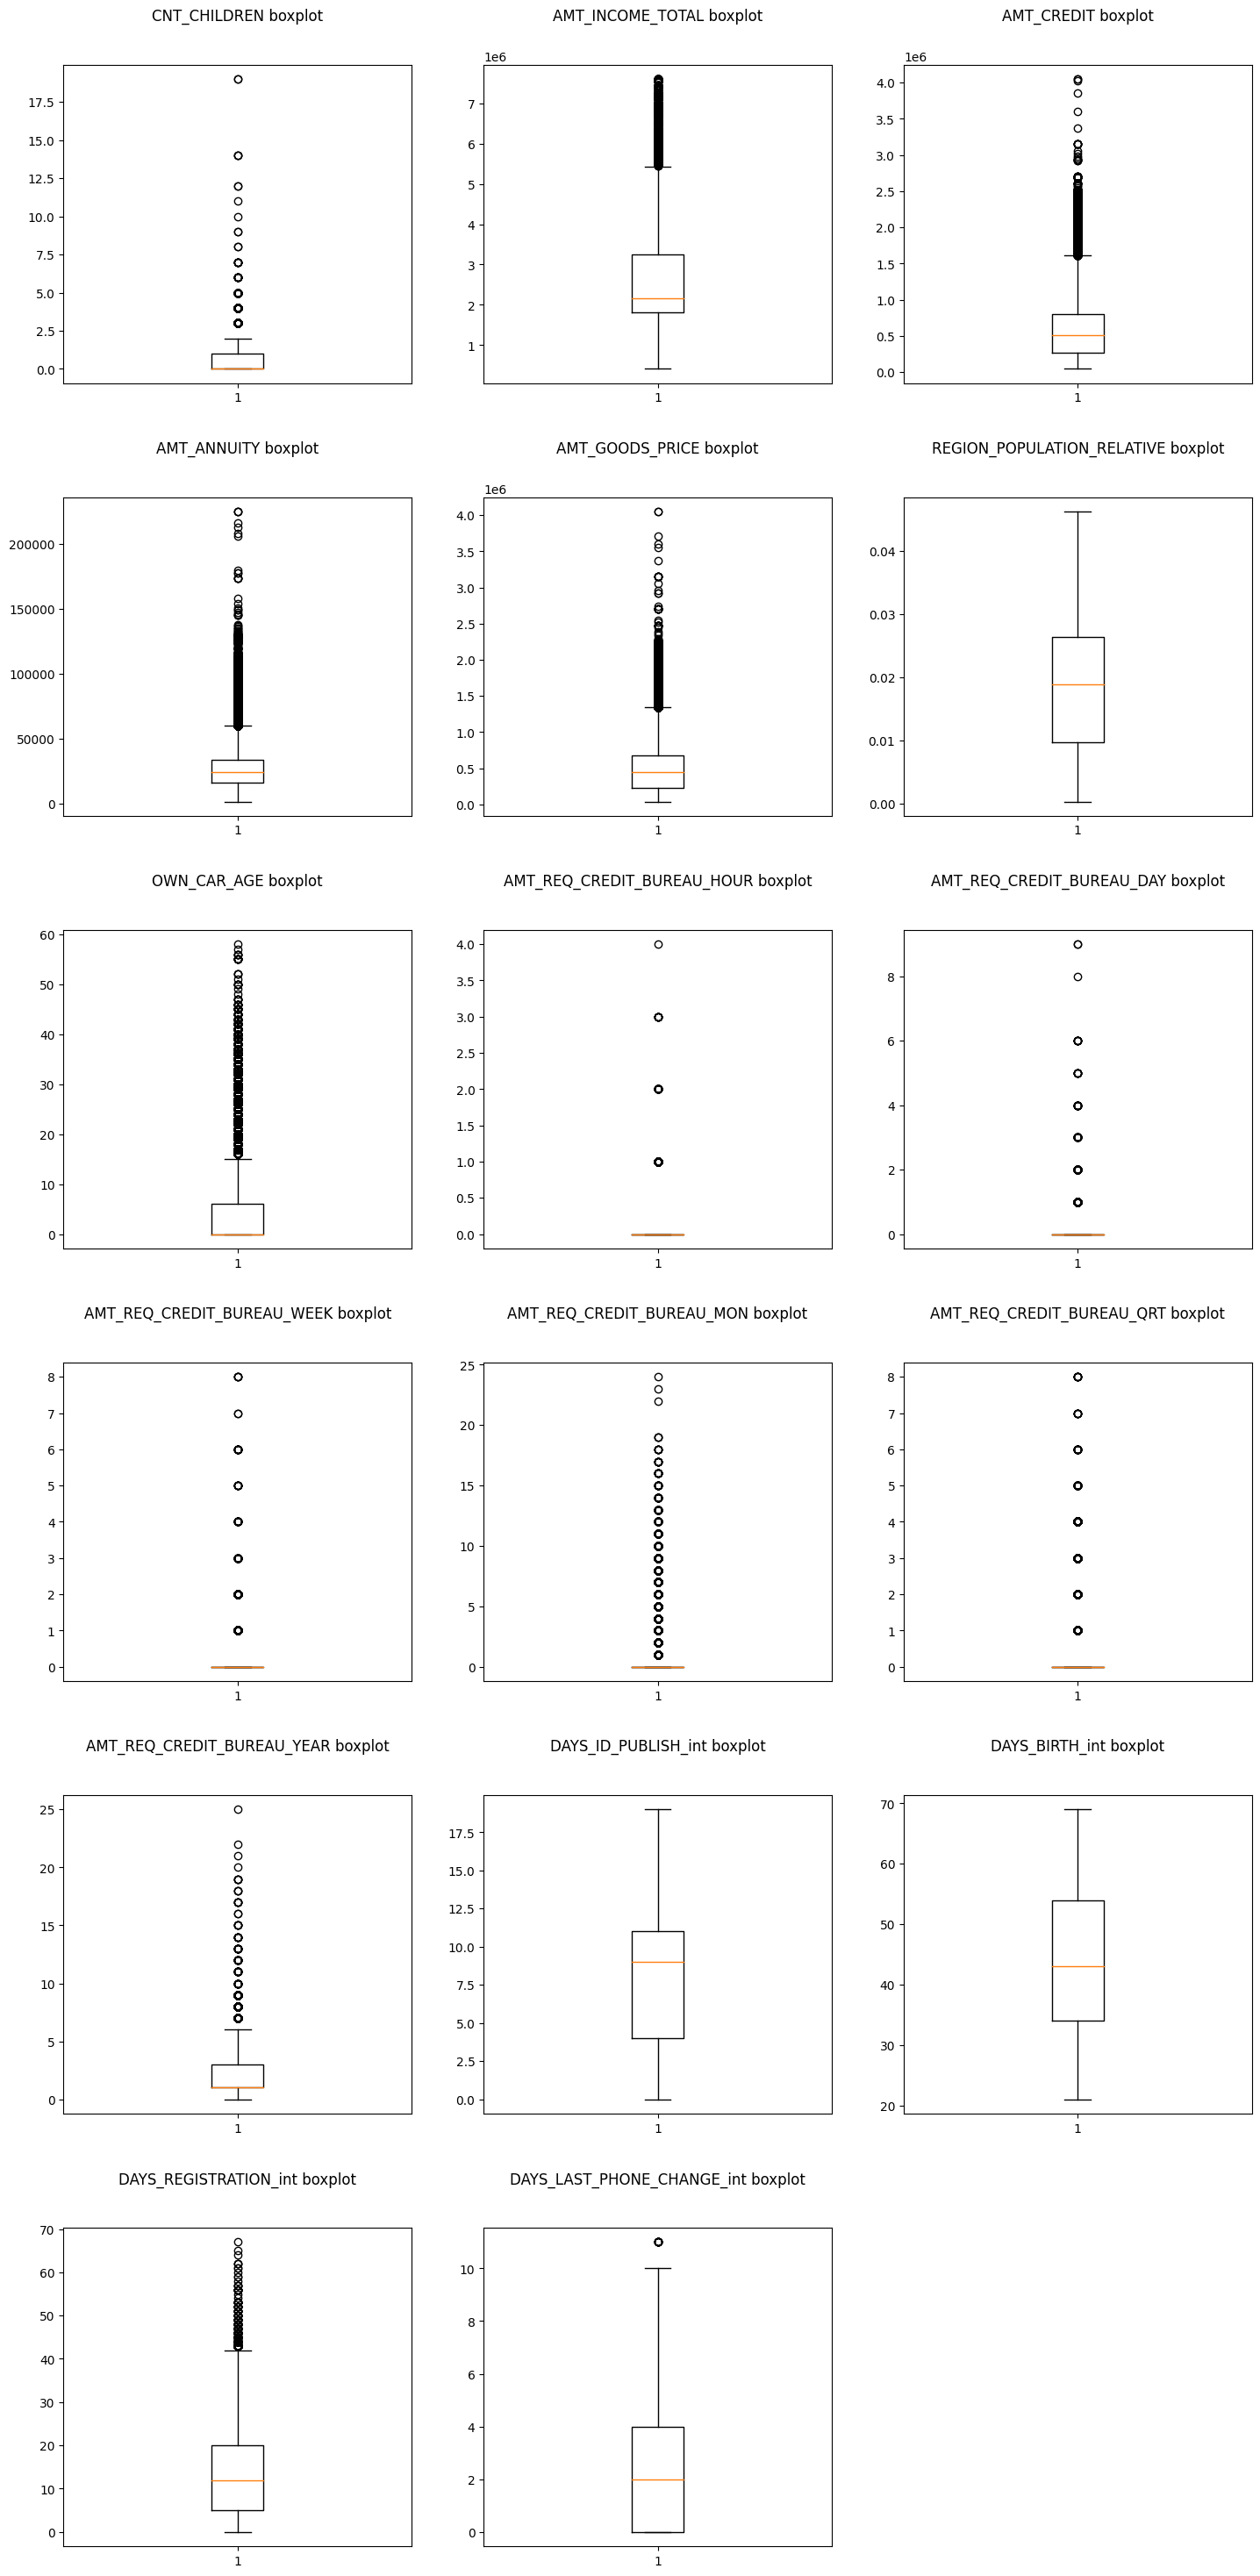

In [ ]:
# 인코딩 안해도 되는 컬럼들
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

plt.figure(figsize=(15,30))

for i in range(len(n_encoding_column)):
    plt.subplot(len(n_encoding_column) // 3 + 1,3,i+1)

    plt.title(f"{n_encoding_column[i]} boxplot\n\n")
    plt.boxplot(df[n_encoding_column[i]])


plt.tight_layout(pad=3)
plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 스케일링

#### 왜도 첨도 보고 스케일링할 컬럼명 파악

In [ ]:
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

In [ ]:
df_skew_kur = df[n_encoding_column]

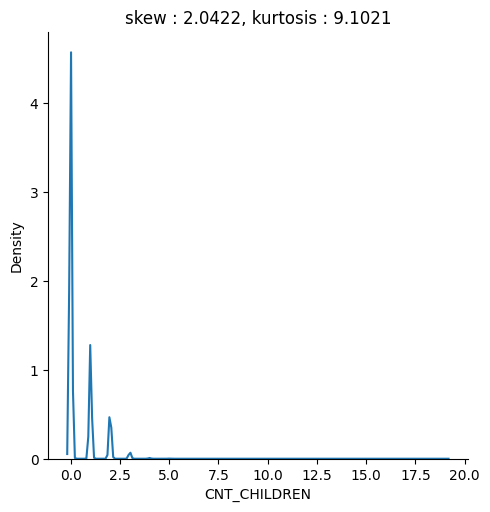

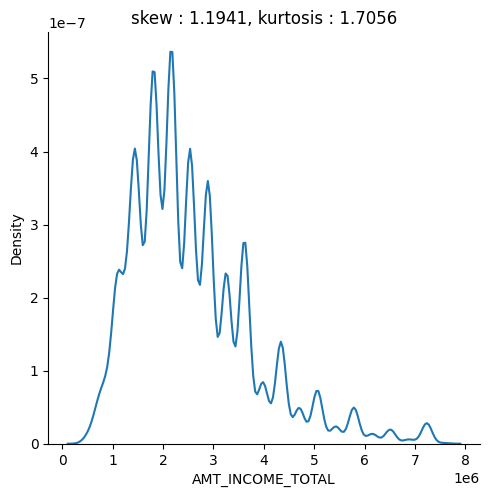

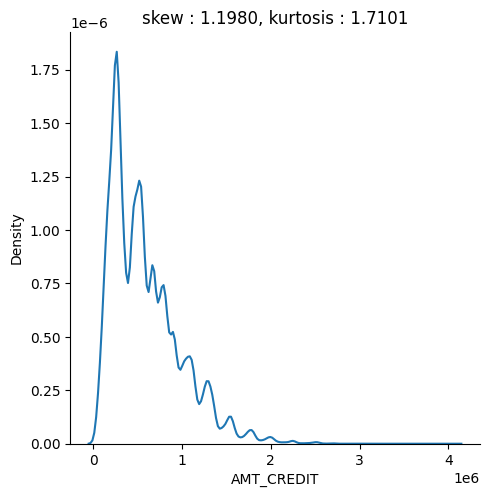

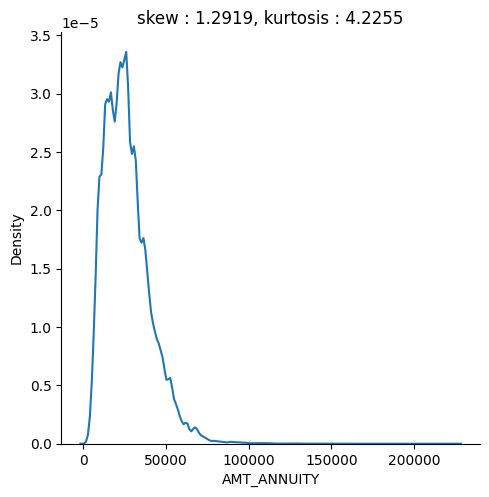

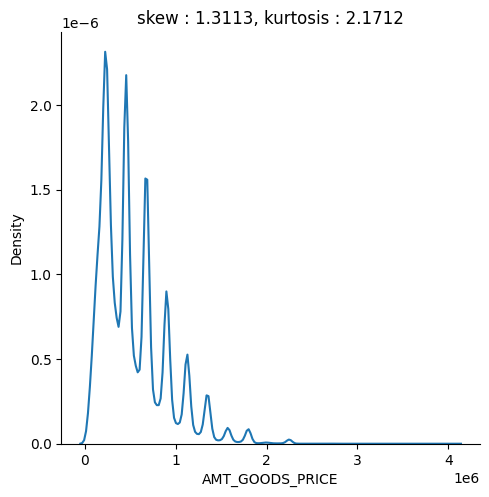

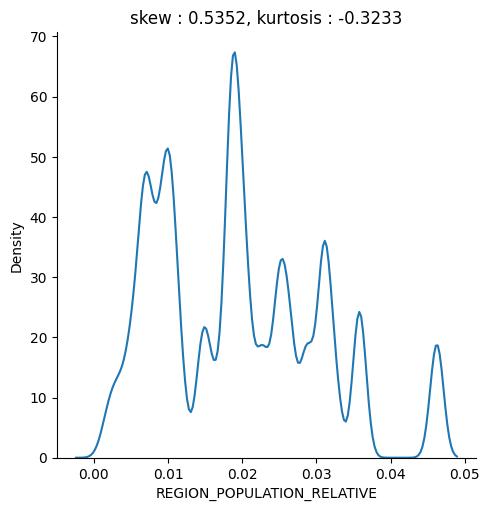

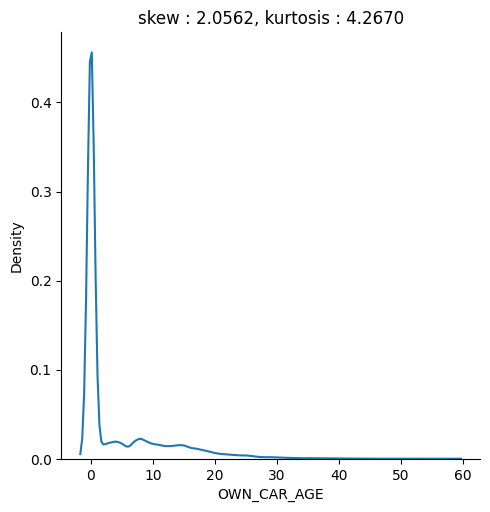

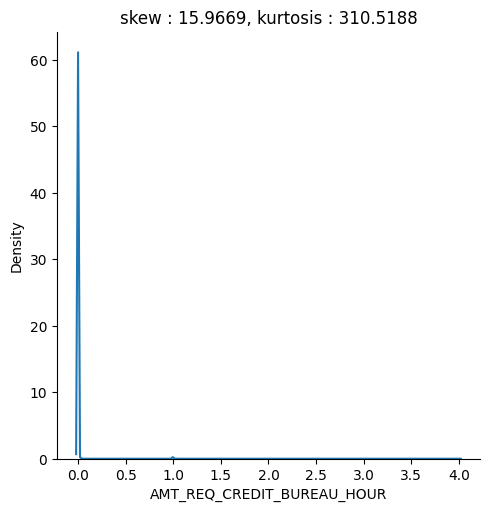

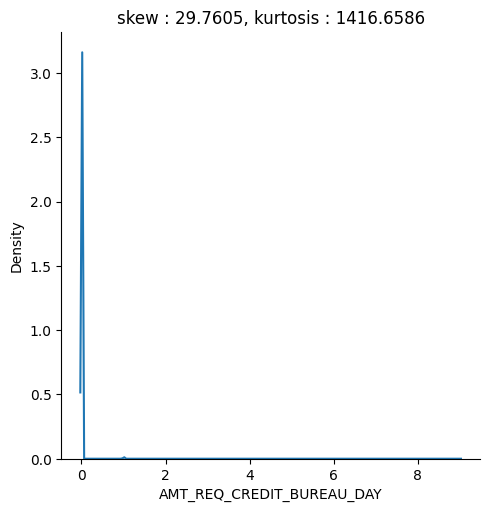

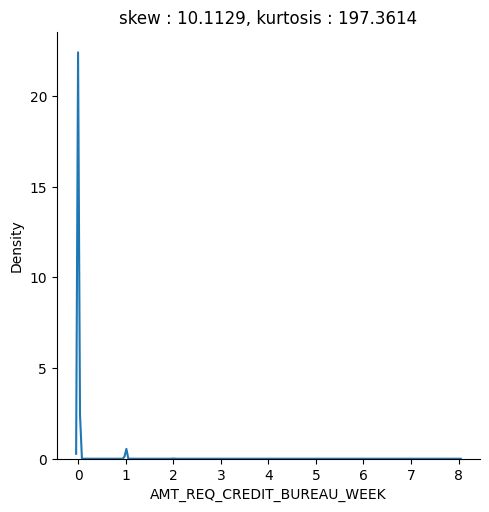

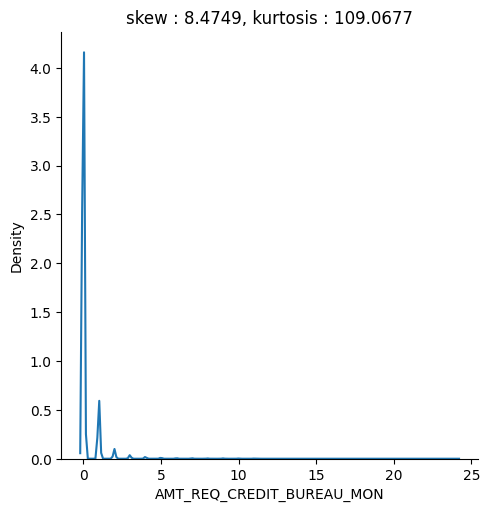

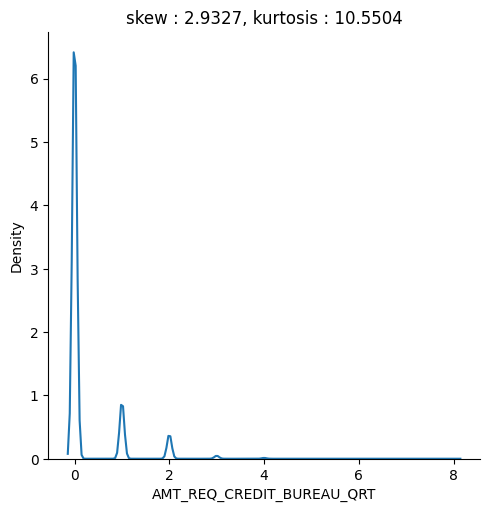

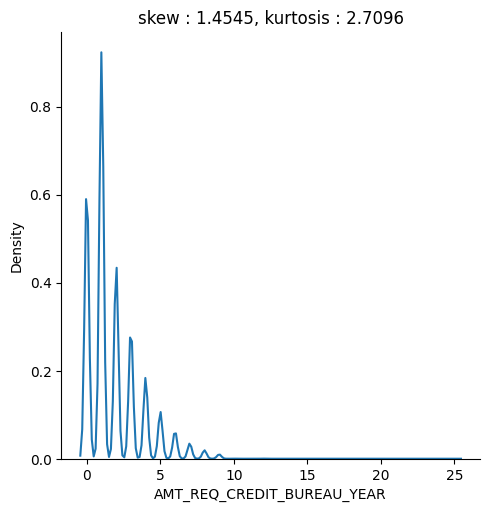

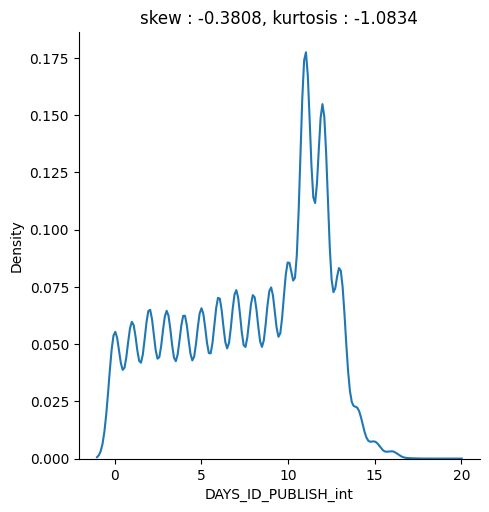

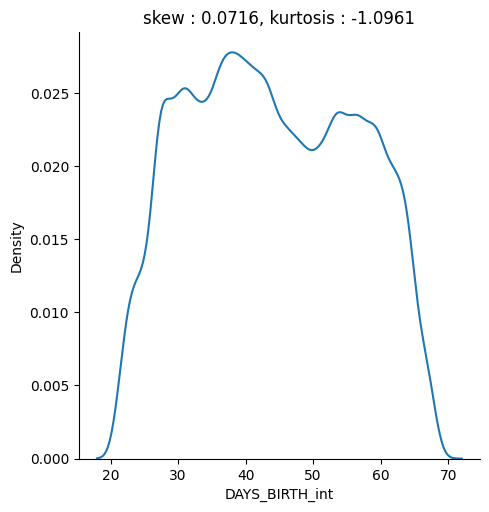

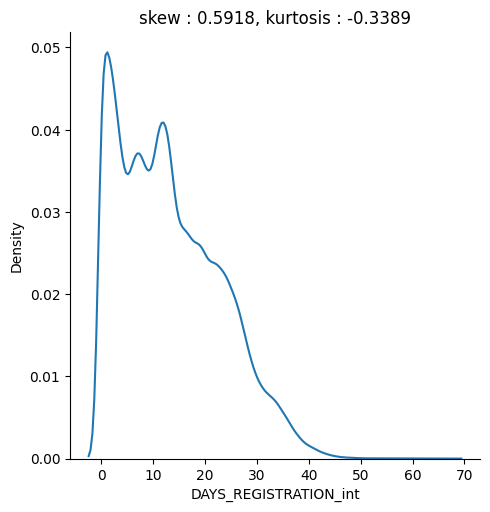

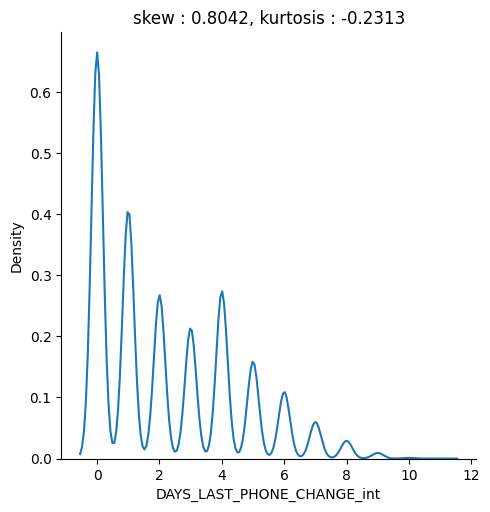

In [ ]:
from scipy.stats import skew, kurtosis
import seaborn as sns

# 왜도
skew = skew(df_skew_kur)

# 첨도
kur = kurtosis(df_skew_kur, fisher=True)

for i,col in enumerate(df_skew_kur.columns):
    sns.displot(df_skew_kur[col], kind="kde").set(title=f"skew : {skew[i]:.4f}, kurtosis : {kur[i]:.4f}")
    # 'CNT_CHILDREN', 'AMT_ANNUITY', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'

#### 스케일링

#### 로그변환

In [ ]:
df[['CNT_CHILDREN', 'AMT_ANNUITY', 'OWN_CAR_AGE', 
          'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

,CNT_CHILDREN,AMT_ANNUITY,OWN_CAR_AGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,24700.5,0,0,0,0,0,0,1
1,0,35698.5,0,0,0,0,0,0,0
2,0,6750.0,27,0,0,0,0,0,0
3,0,29686.5,0,0,0,0,0,0,1
4,0,21865.5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
307506,0,27558.0,0,0,0,0,0,0,1
307507,0,12001.5,0,0,0,0,0,0,1
307508,0,29979.0,0,1,0,0,1,0,1
307509,0,20205.0,0,0,0,0,0,0,0


In [ ]:
log_tr = ['CNT_CHILDREN', 'AMT_ANNUITY', 'OWN_CAR_AGE', 
          'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for col in log_tr:
  df[col] = np.log1p(df[col])

df[['CNT_CHILDREN', 'AMT_ANNUITY', 'OWN_CAR_AGE', 
          'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

,CNT_CHILDREN,AMT_ANNUITY,OWN_CAR_AGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,10.114619,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.693147
1,0.0,10.482892,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,0.0,8.817446,3.332205,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,0.0,10.298481,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.693147
4,0.0,9.992711,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
307506,0.0,10.224084,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.693147
307507,0.0,9.392870,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.693147
307508,0.0,10.308286,0.000000,0.693147,0.0,0.0,0.693147,0.0,0.693147
307509,0.0,9.913735,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 인코딩 안해도 되는 컬럼들
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

df_scailing = df[n_encoding_column]

df_scailing = StandardScaler().fit_transform(df_scailing)

df_scailing = pd.DataFrame(df_scailing,columns=n_encoding_column)

#### 왜도 첨도 확인

In [ ]:
from scipy.stats import skew, kurtosis

# 왜도
skew = skew(df_scailing)

# 첨도
kur = kurtosis(df_scailing, fisher=True)

스케일링 한 후 분포 그리기

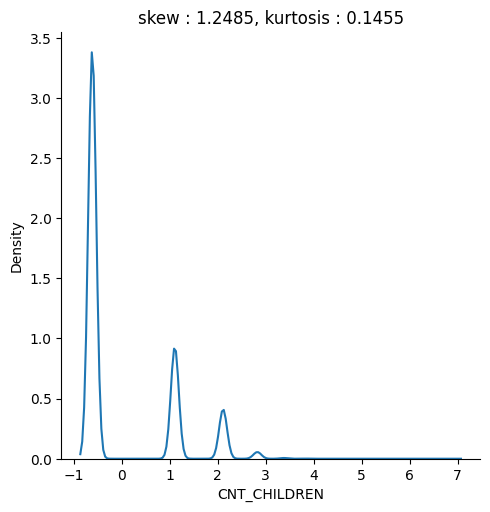

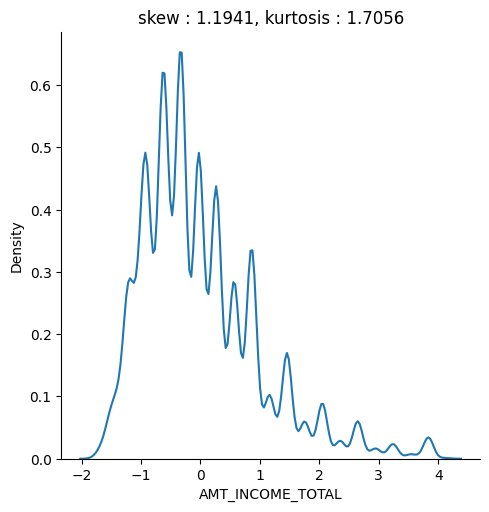

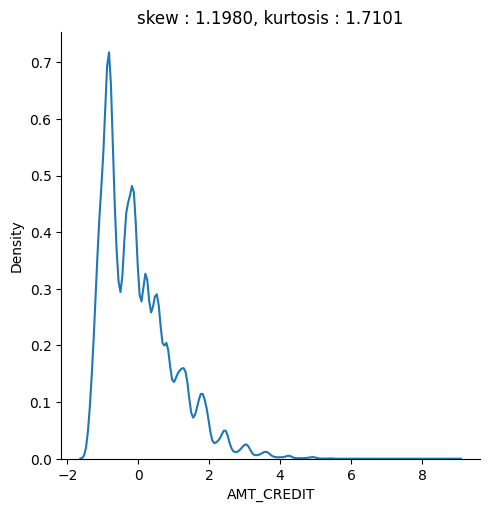

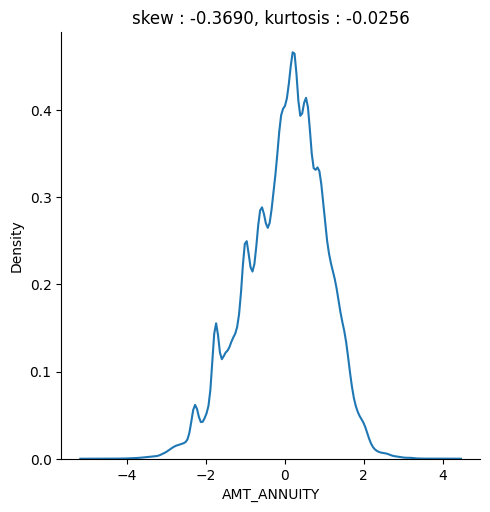

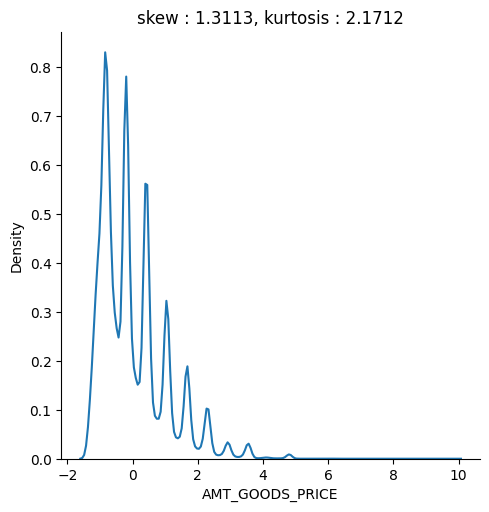

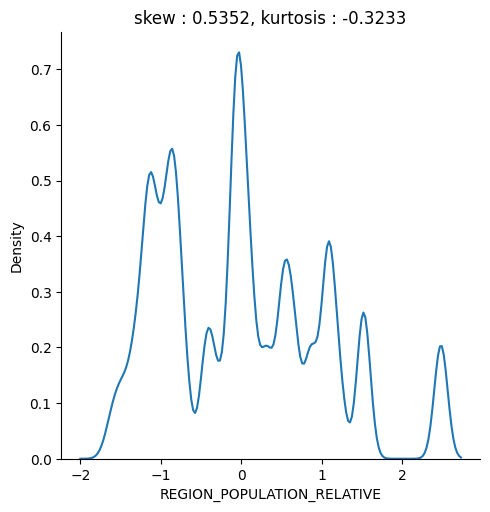

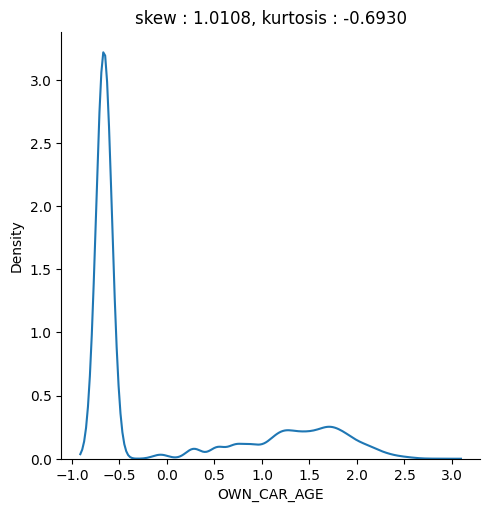

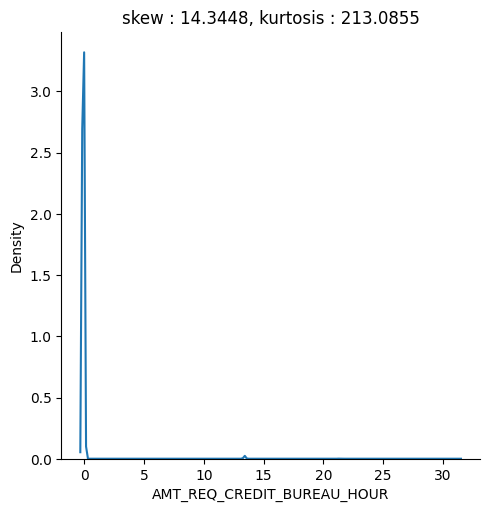

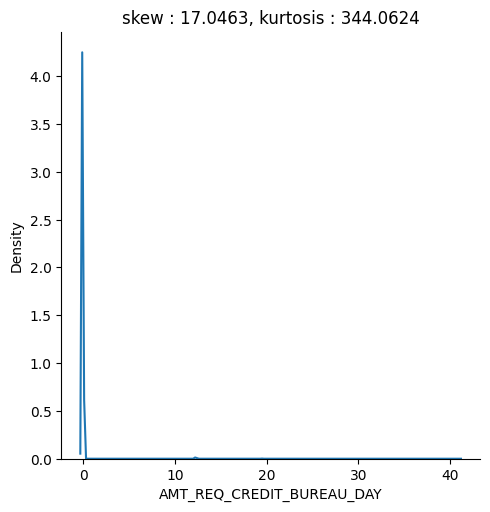

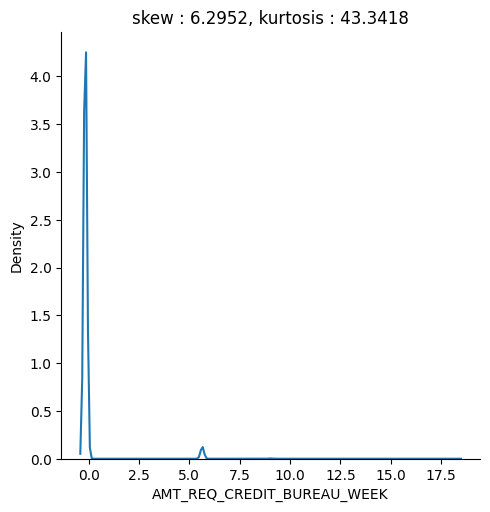

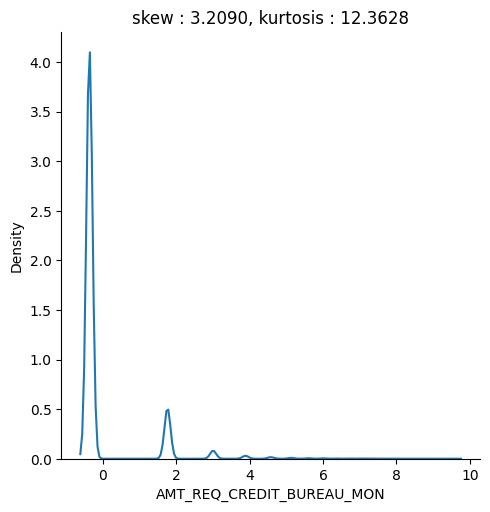

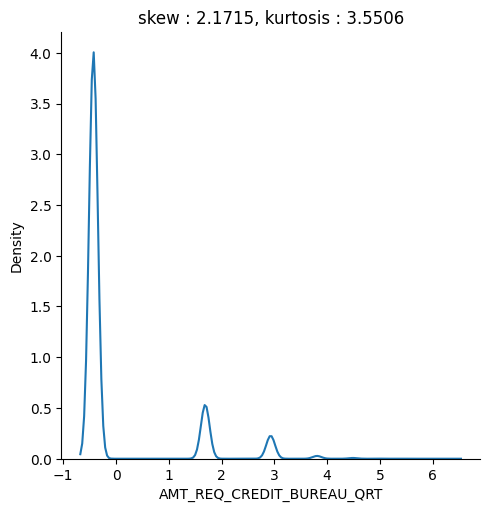

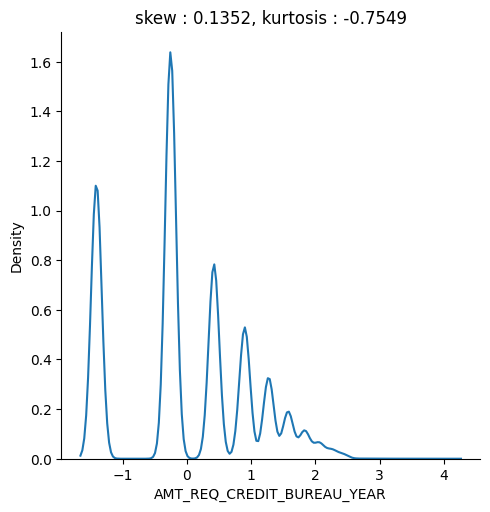

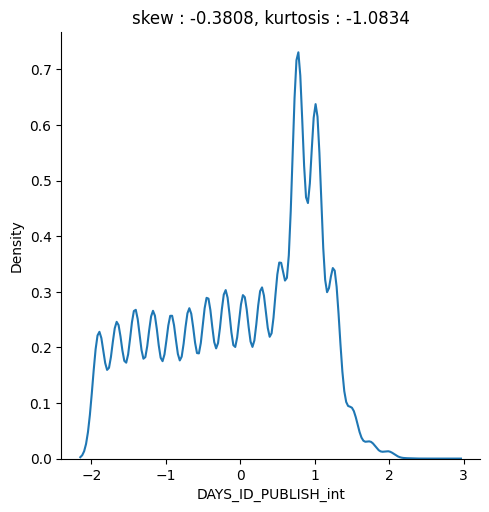

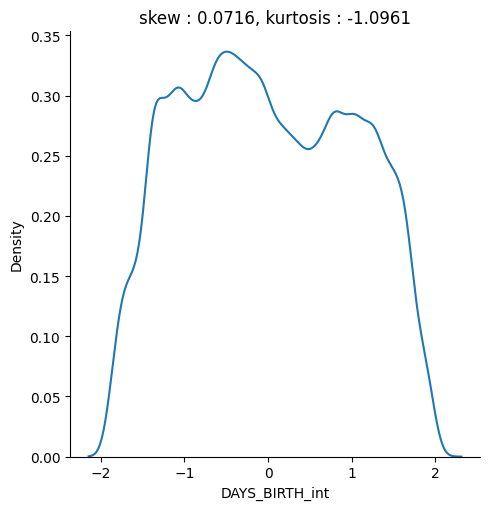

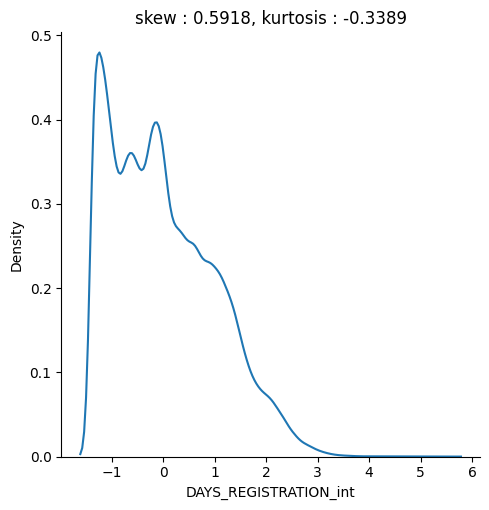

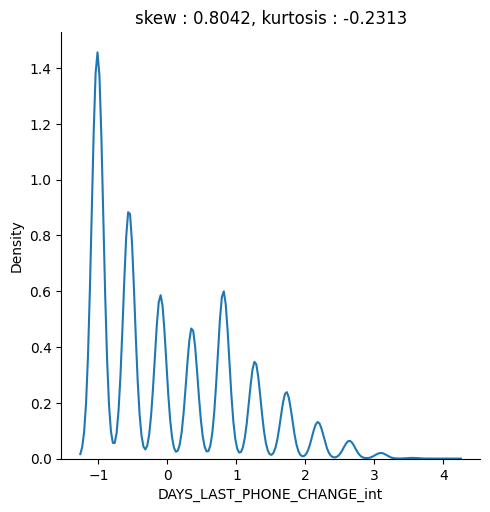

In [ ]:
for i,col in enumerate(df_scailing.columns):
    sns.displot(df_scailing[col], kind="kde").set(title=f"skew : {skew[i]:.4f}, kurtosis : {kur[i]:.4f}")
# 첨도가 3 넘는 것들: CNT_CHILDREN , AMT_ANNUITY, OWN_CAR_AGE, AMT_REQ_CREDIT_BURAU_HOUR (엄청 심각), AMT_REQ_CREDIT_BURAU_DAY (엄청 심각),AMT_REQ_CREDIT_BURAU_WEEK (엄청 심각),
# AMT_REQ_CREDIT_BURAU_MON (엄청 심각), AMT_REQ_CREDIT_BURAU_QRT, 
# 첨도가 음수? REGION_POPULATION_RELATIVE, DAYS_ID_PUBLISH_int, DAYS_BIRTH_int, DAYS_REGISTRATION_int, DAYS_LAST_PHONE_CHANGE_int
# 첨도가 음수인 경우에는 데이터의 분포가 정규분포보다 더 완만함을 의미합니다.
# 일반적으로 왜도의 절대값이 2미만인 경우 '치우쳐저 있지 않다’라고 할 수 있습니다

### 다중공선성 확인

In [ ]:
# 인코딩 안해도 되는 컬럼들
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

<Axes: >

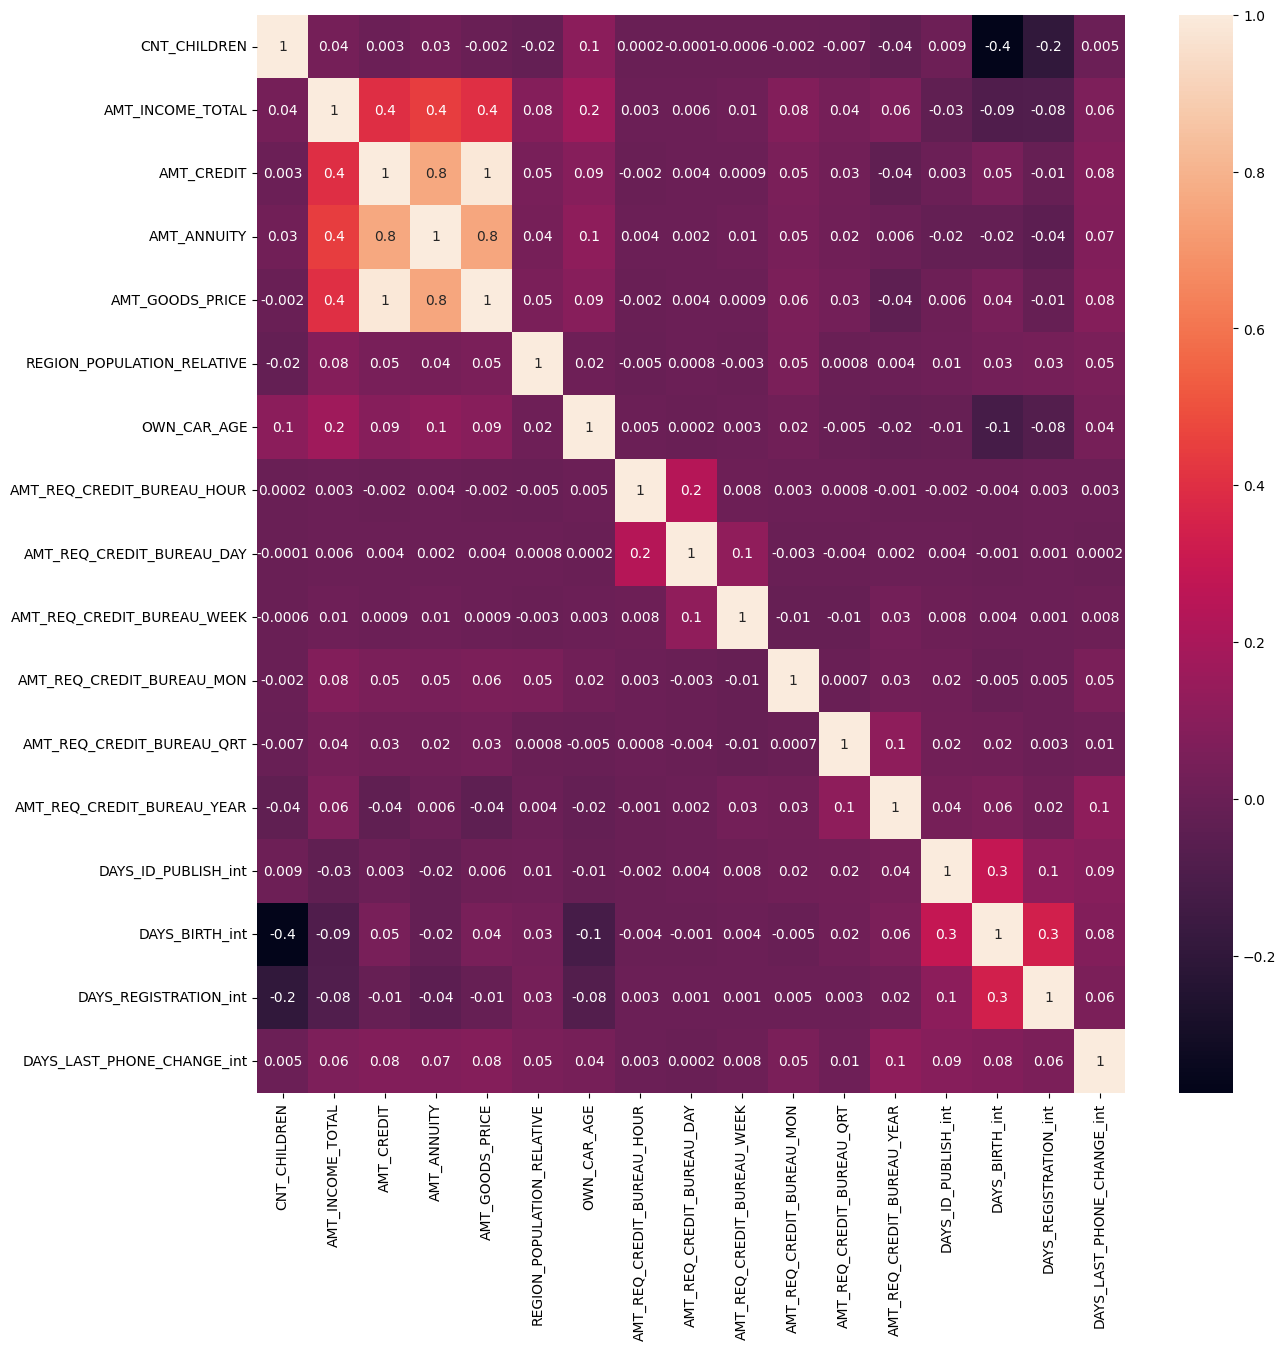

In [ ]:
corr = df[n_encoding_column].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

#### 히트맵 확인 후 삭제할 컬럼
> AMT_ANNUITY  
> AMT_GOODS_PRICE  


In [ ]:
df.drop(['AMT_ANNUITY', 'AMT_GOODS_PRICE'], axis =1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254543 entries, 0 to 307510
Data columns (total 77 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   TARGET                                   254543 non-null  int64  
 1   CNT_CHILDREN                             254543 non-null  float64
 2   AMT_INCOME_TOTAL                         254543 non-null  int64  
 3   AMT_CREDIT                               254543 non-null  float64
 4   NAME_TYPE_SUITE_0                        254543 non-null  int64  
 5   NAME_TYPE_SUITE_1                        254543 non-null  int64  
 6   NAME_TYPE_SUITE_2                        254543 non-null  int64  
 7   NAME_TYPE_SUITE_3                        254543 non-null  int64  
 8   NAME_INCOME_TYPE_0                       254543 non-null  int64  
 9   NAME_INCOME_TYPE_1                       254543 non-null  int64  
 10  NAME_INCOME_TYPE_2              

### 데이터프레임에서 Target 제거

In [ ]:
df.to_csv("./credit_default.csv",index=False)